In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/LOMBA"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [ ]:
#changing the working directory
%cd /content/gdrive/My Drive/LOMBA
#Check the present working directory using pwd command

/content/gdrive/My Drive/LOMBA


In [ ]:
!kaggle competitions download -c scl-2021-ds

sampleSubmission.csv: Skipping, found more recently modified local copy (use --force to force download)
  0% 0.00/979k [00:00<?, ?B/s]
100% 979k/979k [00:00<00:00, 30.9MB/s]
 97% 7.00M/7.18M [00:00<00:00, 70.8MB/s]
100% 7.18M/7.18M [00:00<00:00, 62.7MB/s]


In [ ]:
!ls

address_prep.csv   best_model.h5       df_tp.csv	  sampleSubmission.csv
Administrasi	   contacts.json       HELIX.ipynb	  Street_pre_train.csv
annot2.csv	   dataset_poi.csv     kaggle.json	  Street_train.csv
annot3.csv	   dataset_street.csv  model1.h5	  test.csv
annot.csv	   df_dict.csv	       POI_pre_train.csv  test.csv.zip
annot_wspace2.csv  df_new_dict.csv     POI_train.csv	  train.csv
annot_wspace3.csv  df_pred.csv	       result1.csv	  train.csv.zip
annot_wspace.csv   df_tag.csv	       result.csv


In [ ]:
!unzip \*.zip  && rm *.zip

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import re
import seaborn as sns
from collections import Counter
from heapq import nlargest 
from sklearn.preprocessing import RobustScaler
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

## WORD PROCESSING

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.head()

,id,raw_address,POI/street
0,0,jl kapuk timur delta sili iii lippo cika 11 a ...,/jl kapuk timur delta sili iii lippo cika
1,1,"aye, jati sampurna",/
2,2,setu siung 119 rt 5 1 13880 cipayung,/siung
3,3,"toko dita, kertosono",toko dita/
4,4,jl. orde baru,/jl. orde baru


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           300000 non-null  int64 
 1   raw_address  300000 non-null  object
 2   POI/street   300000 non-null  object
dtypes: int64(1), object(2)
memory usage: 6.9+ MB


In [ ]:
POIS = df['POI/street'].values

In [ ]:
POI = []
Street = []
for i in POIS:
  POI.append(i.split('/')[0])
  Street.append(i.split('/')[1])

In [ ]:
print(POI[0:5])
print(Street[0:5])
print(len(POI),len(Street))

['', '', '', 'toko dita', '']
['jl kapuk timur delta sili iii lippo cika', '', 'siung', '', 'jl. orde baru']
300000 300000


In [ ]:
df['POI'] = POI
df['Street'] = Street

In [ ]:
df.head()

,id,raw_address,POI/street,POI,Street
0,0,jl kapuk timur delta sili iii lippo cika 11 a ...,/jl kapuk timur delta sili iii lippo cika,,jl kapuk timur delta sili iii lippo cika
1,1,"aye, jati sampurna",/,,
2,2,setu siung 119 rt 5 1 13880 cipayung,/siung,,siung
3,3,"toko dita, kertosono",toko dita/,toko dita,
4,4,jl. orde baru,/jl. orde baru,,jl. orde baru


True


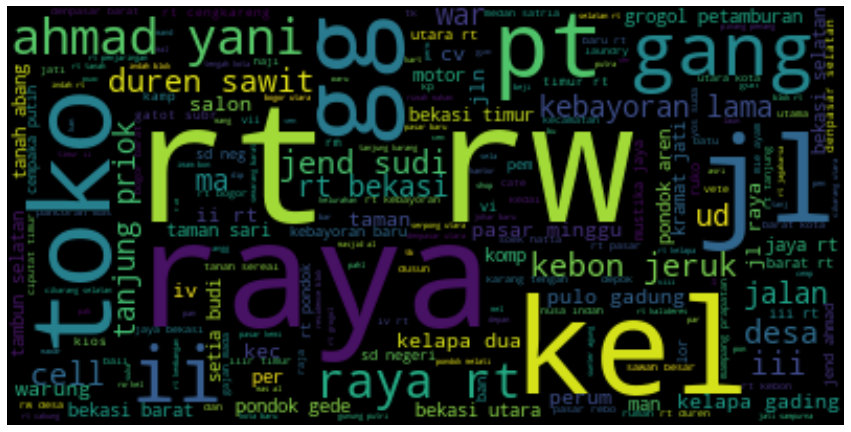

In [ ]:
raw_add = np.array(df['raw_address'])
raw_add_all = ' '.join(raw_add)
print(raw_add_all.islower())

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)

wordcloud = WordCloud().generate(raw_add_all)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

True


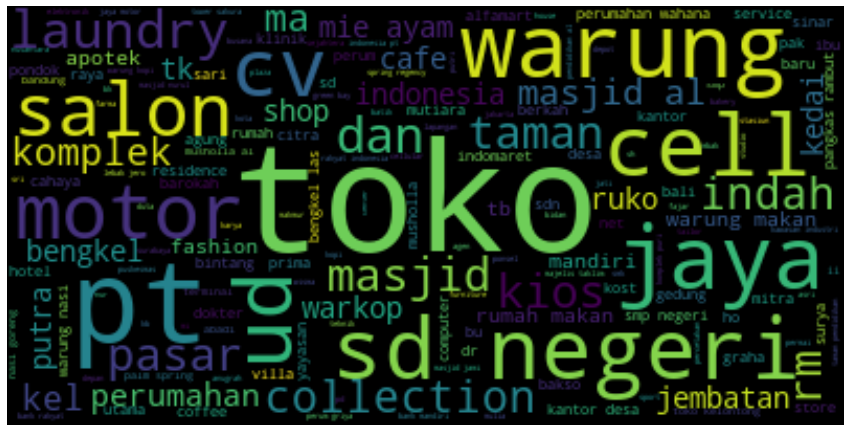

In [ ]:
poi_add = np.array(df['POI'])
poi_add_all = ' '.join(poi_add)
print(poi_add_all.islower())

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)

wordcloud1 = WordCloud().generate(poi_add_all)

# Display the generated image:
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

True


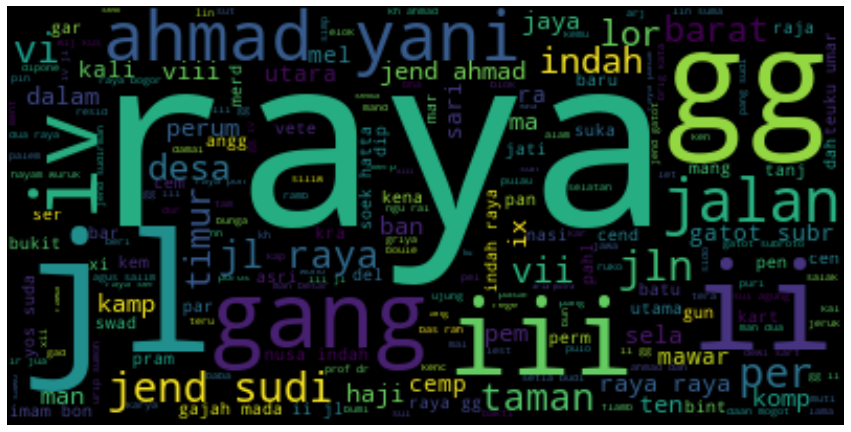

In [ ]:
street_add = np.array(df['Street'])
street_add_all = ' '.join(street_add)
print(street_add_all.islower())

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)

wordcloud2 = WordCloud().generate(street_add_all)

# Display the generated image:
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
patterns= [r'\W+']
match = []
for p in patterns:
  match.append(re.findall(p, raw_add_all))
match = np.array(match)
match = set(match[0,:])
print(len(match))
match = list(match)
print(match[0:5])

337
[' : *', ' ((', ' ??? ', '],\xa0', '. ( ']


In [ ]:
def dot_comma(word):
  word = re.sub(r'(.)\1+', r'\1\1', word)
  word = word.replace(',',' comma ')
  word = word.replace('.',' dot ')
  word = re.sub(r'\W+', ' ', word)
  #word = re.sub('\d|\d\d',' NUMBER ', word)
  #word = re.sub(r'(.)\1+', r'\1\1', word)
  
  return word

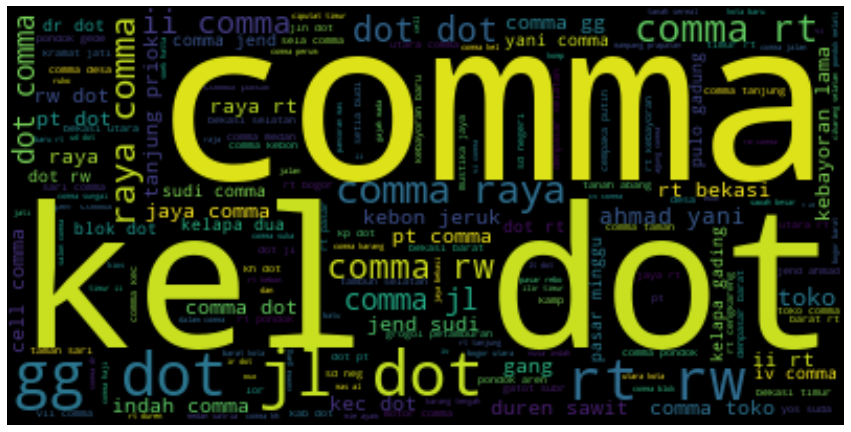

In [ ]:
raw_add = np.array(df['raw_address'])
raw_add_all = ' '.join(raw_add)
raw_add_all = dot_comma(raw_add_all)

plt.rcParams["figure.figsize"] = (15,10)

wordcloud3 = WordCloud().generate(raw_add_all)

# Display the generated image:
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.show()

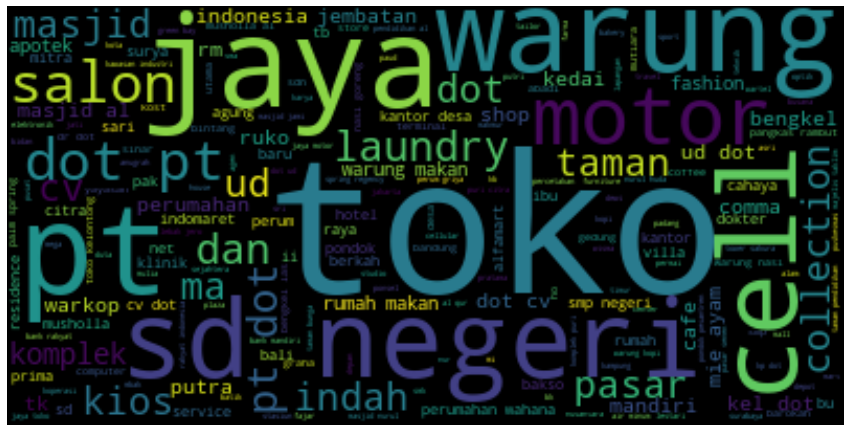

In [ ]:
poi_add = np.array(df['POI'])
poi_add_all = ' '.join(poi_add)
poi_add_all = dot_comma(poi_add_all)

plt.rcParams["figure.figsize"] = (15,10)

wordcloud4 = WordCloud().generate(poi_add_all)

# Display the generated image:
plt.imshow(wordcloud4, interpolation='bilinear')
plt.axis("off")
plt.show()

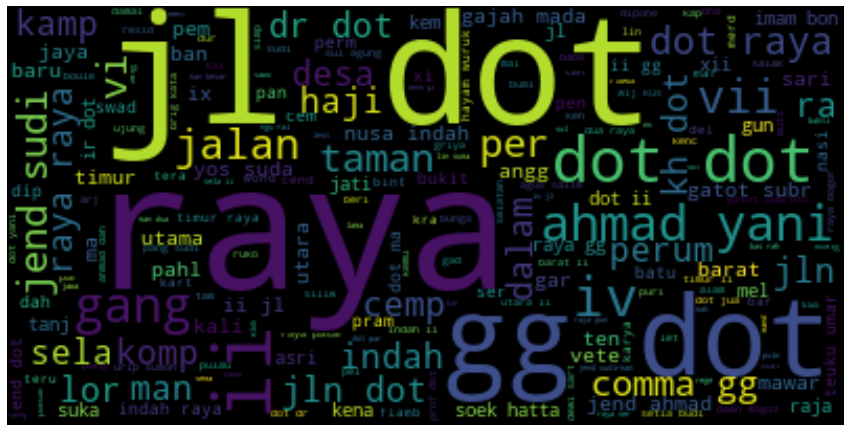

In [ ]:
street_add = np.array(df['Street'])
street_add_all = ' '.join(street_add)
street_add_all = dot_comma(street_add_all)

plt.rcParams["figure.figsize"] = (15,10)

wordcloud5 = WordCloud().generate(street_add_all)

# Display the generated image:
plt.imshow(wordcloud5, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
patterns= [r'\W+']
match = []
for p in patterns:
  match.append(re.findall(p, raw_add_all))
match = np.array(match)
match = set(match[0,:])
print(len(match))
match = list(match)
print(match[0:5])

1
[' ']


In [ ]:
raw_add = np.array(df['raw_address'])
raw_add_all = []
for i in raw_add:
  raw_add_all.append(dot_comma(i))

raw_add_all[0:10]

['jl kapuk timur delta sili ii lippo cika 11 a cicau cikarang pusat',
 'aye comma jati sampurna',
 'setu siung 119 rt 5 1 13880 cipayung',
 'toko dita comma kertosono',
 'jl dot orde baru',
 'raya samb gede comma 299 toko bb kids',
 'kem mel raya comma no 4 bojong rawalumbu rt 1 36 rawalumbu',
 'tela keuramat kuta alam',
 'gg dot i wates magersari',
 'bunga ncole ix 2']

In [ ]:
poi_add = np.array(df['POI'])
poi_add_all = []
for i in poi_add:
  poi_add_all.append(dot_comma(i))

poi_add_all[0:10]

['', '', '', 'toko dita', '', 'toko bb kids', '', '', '', '']

In [ ]:
street_add = np.array(df['Street'])
street_add_all = []
for i in street_add:
  street_add_all.append(dot_comma(i))

street_add_all[0:10]

['jl kapuk timur delta sili ii lippo cika',
 '',
 'siung',
 '',
 'jl dot orde baru',
 'raya samb gede',
 'kem mel raya',
 'tela',
 'gg dot i',
 'bunga ncole ix']

In [ ]:
df['raw_address_pre'] = raw_add_all
df['POI_pre'] = poi_add_all
df['Street_pre'] = street_add_all
df.head(10)

,id,raw_address,POI/street,POI,Street,raw_address_pre,POI_pre,Street_pre
0,0,jl kapuk timur delta sili iii lippo cika 11 a ...,/jl kapuk timur delta sili iii lippo cika,,jl kapuk timur delta sili iii lippo cika,jl kapuk timur delta sili ii lippo cika 11 a c...,,jl kapuk timur delta sili ii lippo cika
1,1,"aye, jati sampurna",/,,,aye comma jati sampurna,,
2,2,setu siung 119 rt 5 1 13880 cipayung,/siung,,siung,setu siung 119 rt 5 1 13880 cipayung,,siung
3,3,"toko dita, kertosono",toko dita/,toko dita,,toko dita comma kertosono,toko dita,
4,4,jl. orde baru,/jl. orde baru,,jl. orde baru,jl dot orde baru,,jl dot orde baru
5,5,"raya samb gede, 299 toko bb kids",toko bb kids/raya samb gede,toko bb kids,raya samb gede,raya samb gede comma 299 toko bb kids,toko bb kids,raya samb gede
6,6,"kem mel raya, no 4 bojong rawalumbu rt 1 36 ra...",/kem mel raya,,kem mel raya,kem mel raya comma no 4 bojong rawalumbu rt 1 ...,,kem mel raya
7,7,tela keuramat kuta alam,/tela,,tela,tela keuramat kuta alam,,tela
8,8,gg. i wates magersari,/gg. i,,gg. i,gg dot i wates magersari,,gg dot i
9,9,bunga ncole ix 2,/bunga ncole ix,,bunga ncole ix,bunga ncole ix 2,,bunga ncole ix


In [ ]:
idx = range(len(df))
#idx = np.arange(0,10)
raw_word_ = df['raw_address_pre'].values
poi_word_ = df['POI_pre'].values
street_word_ = df['Street_pre'].values
anto = []
all_word = []
idx_false = []

for i in tqdm(idx):
  word = []
  temp_word = raw_word_[i]
  temp_w = []
  if (poi_word_[i]!="" and street_word_[i]!=""):
    temp_word = re.sub(r'\b' + poi_word_[i] + r'\b',"$"+poi_word_[i]+"$",raw_word_[i]).split("$")  
    for j in range(len(temp_word)):
      if (temp_word[j]!=poi_word_[i] and temp_word[j]!=""):
        temp_w = re.sub(r'\b' + street_word_[i] + r'\b',"$"+street_word_[i]+"$",temp_word[j]).split("$")
        for k in temp_w:
          word.append(k)
      elif (temp_word[j]==poi_word_[i] and temp_word[j]!=""):
        word.append(str(temp_word[j]))
      else:
        continue
    if (poi_word_[i] not in word and street_word_[i] not in word):
      idx_false.append(i)
  elif (poi_word_[i]!=""):
    word = re.sub(r'\b' + poi_word_[i] + r'\b',"$"+poi_word_[i]+"$",raw_word_[i]).split("$")
    if len(word)<2 and poi_word_[i]!=raw_word_[i]:
      idx_false.append(i)
  elif (street_word_[i]!="" and street_word_[i]!=" "):
    word = re.sub(r'\b' + street_word_[i] + r'\b',"$"+street_word_[i]+"$",raw_word_[i]).split("$")
    if len(word)<2 and street_word_[i]!=raw_word_[i]:
      idx_false.append(i)
  else:
    word = raw_word_[i].split()

  word = [x for x in word if x != '' and x != ' ']
  temp_annot = []
  temp_all_word = []
  for l in word:
    temp_w_ = []
    if l==poi_word_[i]:
      temp_w_=l.split()
      for m in range(len(temp_w_)):
        if m==0:
          temp_annot.append("B-POI")
          temp_all_word.append(temp_w_[m])
          #print(temp_w_[m])
        else:
          temp_annot.append("I-POI")
          temp_all_word.append(temp_w_[m])
          #print(temp_w_[m])
    elif l==street_word_[i]:
      temp_w_=l.split()
      for m in range(len(temp_w_)):
        if m==0:
          temp_annot.append("B-STR")
          temp_all_word.append(temp_w_[m])
          #print(temp_w_[m])
        else:
          temp_annot.append("I-STR")
          temp_all_word.append(temp_w_[m])
          #print(temp_w_[m])
    else:
      temp_w_=l.split()
      for m in range(len(temp_w_)):
        temp_annot.append("0")
        temp_all_word.append(temp_w_[m])
        #print(temp_w_[m])
  #print(raw_word_[i]," ",temp_annot)
  all_word.append(temp_all_word)
  anto.append(temp_annot)

100%|██████████| 300000/300000 [00:28<00:00, 10386.02it/s]


In [ ]:
print(idx_false[0:10]," ",len(idx_false)/len(idx)*100,"%")
df.iloc[idx_false,:].head()

[11, 20, 40, 44, 69, 77, 86, 117, 128, 130]   7.733666666666666 %


,id,raw_address,POI/street,POI,Street,raw_address_pre,POI_pre,Street_pre
11,11,"yaya atohar,",yayasan atohariyah/,yayasan atohariyah,,yaya atohar comma,yayasan atohariyah,
20,20,"toko bang ajs,",toko bangunan ajs/,toko bangunan ajs,,toko bang ajs comma,toko bangunan ajs,
40,40,mar tabl metro iringmulyo metro timur,markaz tabligh metro/,markaz tabligh metro,,mar tabl metro iringmulyo metro timur,markaz tabligh metro,
44,44,sd neg 12 anggrek,sd negeri 12 anggrek/,sd negeri 12 anggrek,,sd neg 12 anggrek,sd negeri 12 anggrek,
69,69,cak 11 nagasari karawang barat,/cakrad,,cakrad,cak 11 nagasari karawang barat,,cakrad


7% data masih salah karena kata yang similar tidak terdeteksi

In [ ]:
idx_false_count_word_ = []
for i in tqdm(idx):
  if len(df.iloc[i,5].split()) != len(anto[i]):
    idx_false_count_word_.append(i)

100%|██████████| 300000/300000 [00:09<00:00, 30462.16it/s]


In [ ]:
print(len(idx_false_count_word_)," ",idx_false_count_word_[0:10])

0   []


In [ ]:
i = 201
word = []
temp_word = raw_word_[i]
temp_w = []
if (poi_word_[i]!="" and street_word_[i]!=""):
  temp_word = re.sub(r'\b' + poi_word_[i] + r'\b',"$"+poi_word_[i]+"$",raw_word_[i]).split("$")  
  for j in range(len(temp_word)):
    if (temp_word[j]!=poi_word_[i] and temp_word[j]!=""):
      temp_w = re.sub(r'\b' + street_word_[i] + r'\b',"$"+street_word_[i]+"$",temp_word[j]).split("$")
      for k in temp_w:
        word.append(k)
    elif (temp_word[j]==poi_word_[i] and temp_word[j]!=""):
      word.append(str(temp_word[j]))
    else:
      continue
elif (poi_word_[i]!=""):
  word = re.sub(r'\b' + poi_word_[i] + r'\b',"$"+poi_word_[i]+"$",raw_word_[i]).split("$")
elif (street_word_[i]!="" and street_word_[i]!=" "):
  word = re.sub(r'\b' + street_word_[i] + r'\b',"$"+street_word_[i]+"$",raw_word_[i]).split("$")
else:
  word = raw_word_[i].split()
print(word)

['sungai beringin ', 'toko taher sound', ' comma ', 'sungai beri', ' comma no 62 tembilahan']


Gunakan word similarity

In [ ]:
!pip install fuzzywuzzy

In [ ]:
from fuzzywuzzy import fuzz
#string1 raw string 2 poi/street
def find_keyword(string1,string2):
  keyword = ""
  string1 = string1.split()
  for i in string1:
    if i!='' and fuzz.partial_ratio(i,string2) == 100 and len(keyword.split())<len(string2.split()):
      keyword+=i+" "
  return(keyword[:-1])

In [ ]:
trial_key = find_keyword(df.iloc[idx_false[4],5],df.iloc[idx_false[4],7])
trial_key

'cak'

In [ ]:
                                                                              #TRIAL ERROR#
                                                                    #JANGAN RUN DULU RUN YANG BAWAH DULU#
                                                                              #TRIAL ERROR#
trial_id = 100
#i = idx_false_new[trial_id]
i=38644
word = []
temp_word = raw_word_[i]
temp_w = []
temp_all_word =[]
poi_keyword = ""
street_keyword = ""
if (poi_word_[i]!="" and street_word_[i]!=""):
  poi_keyword = find_keyword(temp_word,poi_word_[i])
  if poi_keyword!="":
    temp_word = re.sub(r'\b' + poi_keyword + r'\b',"$"+poi_keyword+"$",raw_word_[i]).split("$")
  print(temp_word)
  for j in range(len(temp_word)):
    if (temp_word[j]!=poi_keyword and temp_word[j]!=""):
      street_keyword = find_keyword(temp_word[j],street_word_[i])
      if street_keyword!="":
        temp_w = re.sub(r'\b' + street_keyword + r'\b',"$"+street_keyword+"$",temp_word[j]).split("$")
        for k in temp_w:
          word.append(k)
      else:
        word.append(str(temp_word[j]))    
    elif (temp_word[j]==poi_keyword and temp_word[j]!=""):
      word.append(str(temp_word[j]))
    else:
      continue
  word = [x for x in word if x != '' and x != ' ']
  if (poi_keyword not in word and street_keyword not in word):
    idx_false_new.append(i)
elif (poi_word_[i]!=""):
  poi_keyword = find_keyword(raw_word_[i],poi_word_[i])
  if poi_keyword!="":
    word = re.sub(r'\b' + poi_keyword + r'\b',"$"+poi_keyword+"$",raw_word_[i]).split("$")
  word = [x for x in word if x != '' and x != ' ']
  if len(word)<2 and poi_keyword!=raw_word_[i]:
    idx_false_new.append(i)
elif (street_word_[i]!="" and street_word_[i]!=" "):
  street_keyword = find_keyword(raw_word_[i],street_word_[i])
  if street_keyword!="":
    word = re.sub(r'\b' + street_keyword + r'\b',"$"+street_keyword+"$",raw_word_[i]).split("$")
  word = [x for x in word if x != '' and x != ' ']
  if len(word)<2 and street_keyword!=raw_word_[i]:
    idx_false_new.append(i)
else:
  word = raw_word_[i].split()
  word = [x for x in word if x != '' and x != ' ']

for l in word:
  temp_w_ = []
  if l==poi_keyword:
    temp_w_=l.split()
    for m in range(len(temp_w_)):
      if m==0:
        temp_annot.append("B-POI")
        temp_all_word.append(temp_w_[m])
        #print(temp_w_[m])
      else:
        temp_annot.append("I-POI")
        temp_all_word.append(temp_w_[m])
        #print(temp_w_[m])
  elif l==street_keyword:
    temp_w_=l.split()
    for m in range(len(temp_w_)):
      if m==0:
        temp_annot.append("B-STR")
        temp_all_word.append(temp_w_[m])
        #print(temp_w_[m])
      else:
        temp_annot.append("I-STR")
        temp_all_word.append(temp_w_[m])
        #print(temp_w_[m])
  else:
    temp_w_=l.split()
    print(len(temp_w_))
    for m in range(len(temp_w_)):
      temp_annot.append("0")
      temp_all_word.append(temp_w_[m])
print(temp_all_word)

1
1
1
1
['comma', 'parung', 'serab', 'ciledug']


In [ ]:
                                                              #SATU PAKET TRIAL SAMA YANG ATAS#
i = 100
trial_key = find_keyword(df.iloc[i,5],df.iloc[i,7])
trial_word = df.iloc[i,5]
if trial_key!="":
  trial_word = re.sub(r'\b' + trial_key + r'\b',"$"+trial_key+"$",trial_word).split("$")
trial_word = [x for x in trial_word if x != '' and x != ' ']

if trial_key not in trial_word:
    print("error")

print(df.iloc[i,5],"-1-",df.iloc[i,6],"-2-",df.iloc[i,7])
print(trial_key," ",trial_word)

kedai tenun jep senn comma kota bumi comma kebon melati -1- kedai tenun jepara sennaart -2- kota bumi
kota bumi   ['kedai tenun jep senn comma ', 'kota bumi', ' comma kebon melati']


In [ ]:
                                                                              #RUN v2#
idx = range(len(df))
#idx = np.arange(0,10)
raw_word_ = df['raw_address_pre'].values
poi_word_ = df['POI_pre'].values
street_word_ = df['Street_pre'].values
anto = []
all_word = []
idx_false_new=[]
for i in tqdm(idx):
  word = []
  temp_word = raw_word_[i]
  temp_w = []
  poi_keyword = ""
  street_keyword = ""
  if (poi_word_[i]!="" and street_word_[i]!=""):
    poi_keyword = find_keyword(temp_word,poi_word_[i])
    if poi_keyword!="":
      temp_word = re.sub(r'\b' + poi_keyword + r'\b',"$"+poi_keyword+"$",raw_word_[i]).split("$")
    #print(temp_word)
    for j in range(len(temp_word)):
      if (temp_word[j]!=poi_keyword and temp_word[j]!=""):
        street_keyword = find_keyword(temp_word[j],street_word_[i])
        if street_keyword!="":
          temp_w = re.sub(r'\b' + street_keyword + r'\b',"$"+street_keyword+"$",temp_word[j]).split("$")
          for k in temp_w:
            word.append(k)
        else:
          word.append(str(temp_word[j]))    
      elif (temp_word[j]==poi_keyword and temp_word[j]!=""):
        word.append(str(temp_word[j]))
      else:
        continue
    word = [x for x in word if x != '' and x != ' ']
    if (poi_keyword not in word and street_keyword not in word):
      idx_false_new.append(i)
  elif (poi_word_[i]!=""):
    poi_keyword = find_keyword(raw_word_[i],poi_word_[i])
    if poi_keyword!="":
      word = re.sub(r'\b' + poi_keyword + r'\b',"$"+poi_keyword+"$",raw_word_[i]).split("$")
    word = [x for x in word if x != '' and x != ' ']
    if len(word)<2 and poi_keyword!=raw_word_[i]:
      idx_false_new.append(i)
  elif (street_word_[i]!=""and street_word_[i]!=" "):
    street_keyword = find_keyword(raw_word_[i],street_word_[i])
    if street_keyword!="":
      word = re.sub(r'\b' + street_keyword + r'\b',"$"+street_keyword+"$",raw_word_[i]).split("$")
    word = [x for x in word if x != '' and x != ' ']
    if len(word)<2 and street_keyword!=raw_word_[i]:
      idx_false_new.append(i)
  else:
    word = raw_word_[i].split()
    word = [x for x in word if x != '' and x != ' ']

  temp_annot = []
  temp_all_word = []
  for l in word:
    temp_w_ = []
    if l==poi_keyword:
      temp_w_=l.split()
      for m in range(len(temp_w_)):
        if m==0:
          temp_annot.append("B-POI")
          temp_all_word.append(temp_w_[m])
          #print(temp_w_[m])
        else:
          temp_annot.append("I-POI")
          temp_all_word.append(temp_w_[m])
          #print(temp_w_[m])
    elif l==street_keyword:
      temp_w_=l.split()
      for m in range(len(temp_w_)):
        if m==0:
          temp_annot.append("B-STR")
          temp_all_word.append(temp_w_[m])
          #print(temp_w_[m])
        else:
          temp_annot.append("I-STR")
          temp_all_word.append(temp_w_[m])
          #print(temp_w_[m])
    else:
      temp_w_=l.split()
      for m in range(len(temp_w_)):
        temp_annot.append("0")
        temp_all_word.append(temp_w_[m])
        #print(temp_w_[m])
  #print(raw_word_[i]," ",temp_annot)
  all_word.append(temp_all_word)
  anto.append(temp_annot)
  #print(word)

100%|██████████| 300000/300000 [03:18<00:00, 1512.32it/s]


In [ ]:
print(idx_false_new[0:5]," ",len(idx_false_new)/len(idx)*100,"%")
print(len(idx_false_new)," ",len(idx_false))

[54, 167, 364, 577, 664]   0.6186666666666667 %
1856   23201


In [ ]:
for i in idx_false_new[0:10]:
  print("-RA-",df.iloc[i,5],"-POI-",df.iloc[i,6],"-JL-",df.iloc[i,7]," ",anto[i],len(df.iloc[i,5].split()),len(anto[i]))

-RA- samping kiri sd inp dot 3 77 tellongeng desa tellongeng kec dot mare kab dot bone -POI- mare kab dot bone -JL-    ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'] 16 16
-RA- pulo gebang raya pulo geb no 9 rt 2 rw 6 cakung -POI-  -JL- raya pulo geb   ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'] 12 12
-RA- jl r dot a kartini no 24 dekat alun alun jepara kota -POI- alun alun jepara -JL-    ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'] 12 12
-RA- kludan rt 03 rw 03 belakang sdn kludan  -POI- sdn kludan -JL-    ['0', '0', '0', '0', '0', '0', '0', '0'] 8 8
-RA- karet tengsin karet pasar baru barat ii no 30 rt 7 7 tanah abang -POI-  -JL- karet pasar baru barat ii   ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'] 14 14
-RA- restoran tang s dot pusat makanan taman sari comma boulevard palem raya 2809 -POI- taman sari -JL-    ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'] 13 13
-RA- kepu

In [ ]:
idx_false_count_word = []
for i in tqdm(idx):
  if len(df.iloc[i,5].split()) != len(anto[i]):
    idx_false_count_word.append(i)

100%|██████████| 300000/300000 [00:09<00:00, 30076.50it/s]


In [ ]:
for i in idx_false_count_word[0:10]:
  print("-RA-",df.iloc[i,5],"-POI-",df.iloc[i,6],"-JL-",df.iloc[i,7]," ",anto[i])
print(len(idx_false_count_word)," ",idx_false_count_word[0:10])

0   []


In [ ]:
print(len(all_word)," ",len(anto))
idx_check = []
for i in tqdm(idx):
  if len(all_word[i])!=len(anto[i]):
    idx_check.append(idx)

 46%|████▌     | 138599/300000 [00:00<00:00, 1385981.41it/s]

300000   300000


100%|██████████| 300000/300000 [00:00<00:00, 1354113.70it/s]


In [ ]:
#checking both length has equal or not
len(idx_check)

0

In [ ]:
token_0=[]
BIO_tag_0=[]
temp_idx = np.arange(0,5)
for i in tqdm(idx):
  for j in anto[i]:
    BIO_tag_0.append(j)
  for k in all_word[i]:
    token_0.append(k)

In [ ]:
print(len(BIO_tag_0)," ",len(token_0))

2360706   2360706


In [ ]:
df_annot_wspace = pd.DataFrame(
    {'token_0': token_0,
     'BIO_tag_0': BIO_tag_0,
    })

In [ ]:
df_annot_wspace.head(10)

,token_0,BIO_tag_0
0,jl,B-STR
1,kapuk,I-STR
2,timur,I-STR
3,delta,I-STR
4,sili,I-STR
5,ii,I-STR
6,lippo,I-STR
7,cika,I-STR
8,11,0
9,a,0


In [ ]:
df_annot_wspace.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2360706 entries, 0 to 2360705
Data columns (total 2 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   token_0    object
 1   BIO_tag_0  object
dtypes: object(2)
memory usage: 36.0+ MB


In [ ]:
from google.colab import drive

df_annot_wspace.to_csv('annot_wspace2.csv')
!cp annot_wspace2.csv "/content/gdrive/My Drive/LOMBA"

cp: 'annot_wspace2.csv' and '/content/gdrive/My Drive/LOMBA/annot_wspace2.csv' are the same file


Masih bisa ditingkatkan

In [ ]:
df_annot = df.iloc[:,5:8]
df_annot.head()

,raw_address_pre,POI_pre,Street_pre
0,jl kapuk timur delta sili ii lippo cika 11 a c...,,jl kapuk timur delta sili ii lippo cika
1,aye comma jati sampurna,,
2,setu siung 119 rt 5 1 13880 cipayung,,siung
3,toko dita comma kertosono,toko dita,
4,jl dot orde baru,,jl dot orde baru


In [ ]:
for i in idx_false[0:10]:
  print("-RA-",df.iloc[i,5],"-POI-",df.iloc[i,6],"-JL-",df.iloc[i,7])

-RA- yaya atohar comma  -POI- yayasan atohariyah -JL- 
-RA- toko bang ajs comma  -POI- toko bangunan ajs -JL- 
-RA- mar tabl metro iringmulyo metro timur -POI- markaz tabligh metro -JL- 
-RA- sd neg 12 anggrek -POI- sd negeri 12 anggrek -JL- 
-RA- cak 11 nagasari karawang barat -POI-  -JL- cakrad
-RA- tk islam daruss comma  -POI- tk islam darussalam -JL- 
-RA- simpang tiga kah nasu no 112 28284 bukit raya -POI-  -JL- kaharu nasu
-RA- ahmad dah iv kukusan beji -POI-  -JL- ahmad dahlan iv
-RA- grey comma  -POI- grey101 -JL- 
-RA- mangla rege no h1 3 cimekar kel dot cileunyi -POI-  -JL- manglayang rege


In [ ]:
for i in idx_false[0:20]:
  print("-RA-",df_annot.iloc[i,0],"-POI-",df_annot.iloc[i,1],"-JL-",df_annot.iloc[i,2])

-RA- yaya atohar comma  -POI- yayasan atohariyah -JL- 
-RA- toko bang ajs comma  -POI- toko bangunan ajs -JL- 
-RA- mar tabl metro iringmulyo metro timur -POI- markaz tabligh metro -JL- 
-RA- sd neg 12 anggrek -POI- sd negeri 12 anggrek -JL- 
-RA- cak 11 nagasari karawang barat -POI-  -JL- cakrad
-RA- tk islam daruss comma  -POI- tk islam darussalam -JL- 
-RA- simpang tiga kah nasu no 112 28284 bukit raya -POI-  -JL- kaharu nasu
-RA- ahmad dah iv kukusan beji -POI-  -JL- ahmad dahlan iv
-RA- grey comma  -POI- grey101 -JL- 
-RA- mangla rege no h1 3 cimekar kel dot cileunyi -POI-  -JL- manglayang rege
-RA- beng las deny comma mendalanwangi -POI- bengkel las deny -JL- 
-RA- ber nadah agung -POI- berkat nadah agung -JL- 
-RA- taman mer comma 13 electr laun system comma 2 meruya utara -POI- electrolux laundry system -JL- taman meruya
-RA- pasi redjeki comma man kerto v comma mojo -POI- pasifik redjeki -JL- man kertoarjo v
-RA- kan desa sumber wangi tps 1 comma sumber wangi -POI- kantor desa

In [ ]:
                                                            #RUN v3#
idx = range(len(df))
#idx = np.arange(0,10)
raw_word_ = df_annot['raw_address_pre'].values
poi_word_ = df_annot['POI_pre'].values
street_word_ = df_annot['Street_pre'].values
anto_new = []
all_word = []
idx_false_=[]

for i in tqdm(idx):
  word = []
  temp_word = raw_word_[i]
  temp_w = []
  if i not in idx_false:
    if (poi_word_[i]!="" and street_word_[i]!=""):
      temp_word = re.sub(r'\b' + poi_word_[i] + r'\b',"$"+poi_word_[i]+"$",raw_word_[i]).split("$")  
      for j in range(len(temp_word)):
        if (temp_word[j]!=poi_word_[i] and temp_word[j]!=""):
          temp_w = re.sub(r'\b' + street_word_[i] + r'\b',"$"+street_word_[i]+"$",temp_word[j]).split("$")
          for k in temp_w:
            word.append(k)
        elif (temp_word[j]==poi_word_[i] and temp_word[j]!=""):
          word.append(str(temp_word[j]))
        else:
          continue
      if (poi_word_[i] not in word and street_word_[i] not in word):
        idx_false_.append(i)
    elif (poi_word_[i]!=""):
      word = re.sub(r'\b' + poi_word_[i] + r'\b',"$"+poi_word_[i]+"$",raw_word_[i]).split("$")
      if len(word)<2 and poi_word_[i]!=raw_word_[i]:
        idx_false_.append(i)
    elif (street_word_[i]!="" and street_word_[i]!=" "):
      word = re.sub(r'\b' + street_word_[i] + r'\b',"$"+street_word_[i]+"$",raw_word_[i]).split("$")
      if len(word)<2 and street_word_[i]!=raw_word_[i]:
        idx_false_.append(i)
    else:
      word = raw_word_[i].split()
    word = [x for x in word if x != '' and x != ' ']
    temp_annot = []
    temp_all_word = []
    for l in word:
      temp_w_ = []
      if l==poi_word_[i]:
        temp_w_=l.split()
        for m in range(len(temp_w_)):
          if m==0:
            temp_annot.append("B-POI")
            temp_all_word.append(temp_w_[m])
            #print(temp_w_[m])
          else:
            temp_annot.append("I-POI")
            temp_all_word.append(temp_w_[m])
            #print(temp_w_[m])
      elif l==street_word_[i]:
        temp_w_=l.split()
        for m in range(len(temp_w_)):
          if m==0:
            temp_annot.append("B-STR")
            temp_all_word.append(temp_w_[m])
            #print(temp_w_[m])
          else:
            temp_annot.append("I-STR")
            temp_all_word.append(temp_w_[m])
            #print(temp_w_[m])
      else:
        temp_w_=l.split()
        for m in range(len(temp_w_)):
          temp_annot.append("O")
          temp_all_word.append(temp_w_[m])
          #print(temp_w_[m])
    #print(raw_word_[i]," ",temp_annot)
    all_word.append(temp_all_word)
    anto_new.append(temp_annot)

  else:
    word = []
    temp_word = raw_word_[i]
    temp_w = []
    poi_keyword = ""
    street_keyword = ""
    if (poi_word_[i]!="" and street_word_[i]!=""):
      poi_keyword = find_keyword(temp_word,poi_word_[i])
      if poi_keyword!="":
        temp_word = re.sub(r'\b' + poi_keyword + r'\b',"$"+poi_keyword+"$",raw_word_[i]).split("$")
      #print(temp_word)
      for j in range(len(temp_word)):
        if (temp_word[j]!=poi_keyword and temp_word[j]!=""):
          street_keyword = find_keyword(temp_word[j],street_word_[i])
          if street_keyword!="":
            temp_w = re.sub(r'\b' + street_keyword + r'\b',"$"+street_keyword+"$",temp_word[j]).split("$")
            for k in temp_w:
              word.append(k)
          else:
            word.append(str(temp_word[j]))    
        elif (temp_word[j]==poi_keyword and temp_word[j]!=""):
          word.append(str(temp_word[j]))
        else:
          continue
      word = [x for x in word if x != '' and x != ' ']
      if (poi_keyword not in word and street_keyword not in word):
        idx_false_.append(i)
    elif (poi_word_[i]!=""):
      poi_keyword = find_keyword(raw_word_[i],poi_word_[i])
      if poi_keyword!="":
        word = re.sub(r'\b' + poi_keyword + r'\b',"$"+poi_keyword+"$",raw_word_[i]).split("$")
      word = [x for x in word if x != '' and x != ' ']
      if len(word)<2 and poi_keyword!=raw_word_[i]:
        idx_false_.append(i)
    elif (street_word_[i]!=""and street_word_[i]!=" "):
      street_keyword = find_keyword(raw_word_[i],street_word_[i])
      if street_keyword!="":
        word = re.sub(r'\b' + street_keyword + r'\b',"$"+street_keyword+"$",raw_word_[i]).split("$")
      word = [x for x in word if x != '' and x != ' ']
      if len(word)<2 and street_keyword!=raw_word_[i]:
        idx_false_.append(i)
    else:
      word = raw_word_[i].split()
      word = [x for x in word if x != '' and x != ' ']
    temp_annot = []
    temp_all_word = []
    for l in word:
      temp_w_ = []
      if l==poi_keyword:
        temp_w_=l.split()
        for m in range(len(temp_w_)):
          if m==0:
            temp_annot.append("B-POI")
            temp_all_word.append(temp_w_[m])
            #print(temp_w_[m])
          else:
            temp_annot.append("I-POI")
            temp_all_word.append(temp_w_[m])
            #print(temp_w_[m])
      elif l==street_keyword:
        temp_w_=l.split()
        for m in range(len(temp_w_)):
          if m==0:
            temp_annot.append("B-STR")
            temp_all_word.append(temp_w_[m])
            #print(temp_w_[m])
          else:
            temp_annot.append("I-STR")
            temp_all_word.append(temp_w_[m])
            #print(temp_w_[m])
      else:
        temp_w_=l.split()
        for m in range(len(temp_w_)):
          temp_annot.append("O")
          temp_all_word.append(temp_w_[m])
          #print(temp_w_[m])
    #print(raw_word_[i]," ",temp_annot)
    all_word.append(temp_all_word)
    anto_new.append(temp_annot)

100%|██████████| 300000/300000 [02:45<00:00, 1810.98it/s]


In [ ]:
print(idx_false_[0:10]," ",len(idx_false_)/len(idx)*100,"%")
df.iloc[idx_false_,:].head()

[12568, 15099, 16036, 18860, 18900, 22424, 23358, 24512, 25884, 28852]   0.043333333333333335 %


,id,raw_address,POI/street,POI,Street,raw_address_pre,POI_pre,Street_pre
12568,12568,"jl baret biru 3 yg bers 2, gg bers 2 buka:08.0...","/jl baret biru 3 yg bers 2, gg bers 2 buka:08....",,"jl baret biru 3 yg bers 2, gg bers 2 buka:08.0...",jl baret biru 3 yg bers 2 comma gg bers 2 buka...,,jl baret biru 3 yg bers 2 comma gg bers 2 buka...
15099,15099,warung dowo raya war timur rt 1 rw 10 pohjentrek,/raya warung timur,,raya warung timur,warung dowo raya war timur rt 1 rw 10 pohjentrek,,raya warung timur
16036,16036,"tkit al-hi, raya kalija, no 34 purwadadi barat...",/raya kalijati-p,,raya kalijati-p,tkit al hi comma raya kalija comma no 34 purwa...,,raya kalijati p
18860,18860,"r.dj setyo hartono wida se., mm., sh., m.kn ka...","r.djoko setyo hartono widagdo, se., mm., sh., ...","r.djoko setyo hartono widagdo, se., mm., sh., ...",kamp darat tempel,r dot dj setyo hartono wida se dot comma mm do...,r dot djoko setyo hartono widagdo comma se dot...,kamp darat tempel
18900,18900,kena kel.,kenawat kel./,kenawat kel.,,kena kel dot,kenawat kel dot,


In [ ]:
idx_false_count_word = []
for i in tqdm(idx):
  if len(df.iloc[i,5].split()) != len(anto_new[i]):
    idx_false_count_word.append(i)
print(len(all_word)," ",len(anto_new))

idx_check = []
for i in tqdm(idx):
  if len(all_word[i])!=len(anto_new[i]):
    idx_check.append(idx)
#checking both length has equal or not
print("checking both lentgh: ",len(idx_check))

token_0=[]
BIO_tag_0=[]
sentence = []
pos = []

for i in tqdm(idx):
  for j in anto_new[i]:
    BIO_tag_0.append(j)
    pos.append("XXX")
    sentence.append(str(i+1))
  for k in all_word[i]:
    token_0.append(k)    

In [ ]:
print(len(BIO_tag_0)," ",len(token_0)," ",len(sentence))

df_annot_wspace = pd.DataFrame(
    {'Sentence':sentence, 'Word': token_0,
     'Tag': BIO_tag_0,
    })

2360706   2360706   2360706


In [ ]:
for i in (idx_false_new[0:10]):
  print(raw_word_[i]," ",anto_new[i]," ",anto[i]) 
print('\n')
for i in (idx_false_[0:10]):
  print(raw_word_[i]," ",anto_new[i]," ",anto[i]) 

samping kiri sd inp dot 3 77 tellongeng desa tellongeng kec dot mare kab dot bone   ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-POI', 'I-POI', 'I-POI', 'I-POI']   ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
pulo gebang raya pulo geb no 9 rt 2 rw 6 cakung   ['O', 'O', 'B-STR', 'I-STR', 'I-STR', 'O', 'O', 'O', 'O', 'O', 'O', 'O']   ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
jl r dot a kartini no 24 dekat alun alun jepara kota   ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-POI', 'I-POI', 'I-POI', 'O']   ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
kludan rt 03 rw 03 belakang sdn kludan    ['O', 'O', 'O', 'O', 'O', 'O', 'B-POI', 'I-POI']   ['0', '0', '0', '0', '0', '0', '0', '0']
karet tengsin karet pasar baru barat ii no 30 rt 7 7 tanah abang   ['O', 'O', 'B-STR', 'I-STR', 'I-STR', 'I-STR', 'I-STR', 'O', 'O', 'O', 'O', 'O', 'O', 'O']   ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',

In [ ]:
df_annot_wspace.head()

,Sentence,Word,Tag
0,1,jl,B-STR
1,1,kapuk,I-STR
2,1,timur,I-STR
3,1,delta,I-STR
4,1,sili,I-STR


In [ ]:
df_annot_wspace.to_csv('annot_wspace3.csv')
!cp annot_wspace3.csv "/content/gdrive/My Drive/LOMBA"

cp: 'annot_wspace3.csv' and '/content/gdrive/My Drive/LOMBA/annot_wspace3.csv' are the same file


In [ ]:
print(df['POI_pre'].str.split(' ', expand=True).stack().value_counts()[0:10])
print(df['Street_pre'].str.split(' ', expand=True).stack().value_counts()[0:10])

          186850
NUMBER     11343
toko        8097
dot         7022
pt          3933
warung      3276
jaya        2925
al          2291
masjid      2131
taman       2116
dtype: int64
          90910
dot       34418
raya      29987
NUMBER    23483
jl        13611
gg        10917
ii        10702
i          7025
indah      3830
timur      3759
dtype: int64


In [ ]:
df_poi = df['POI']
df_poi_pre = df['POI_pre']
df_street = df['Street']
df_street_pre = df['Street_pre']

df_poi.to_csv('POI_train.csv')
!cp POI_train.csv "/content/gdrive/My Drive/LOMBA"

df_poi_pre.to_csv('POI_pre_train.csv')
!cp POI_pre_train.csv "/content/gdrive/My Drive/LOMBA"

df_street.to_csv('Street_train.csv')
!cp Street_train.csv "/content/gdrive/My Drive/LOMBA"

df_street.to_csv('Street_pre_train.csv')
!cp Street_pre_train.csv "/content/gdrive/My Drive/LOMBA"

cp: 'POI_train.csv' and '/content/gdrive/My Drive/LOMBA/POI_train.csv' are the same file
cp: 'POI_pre_train.csv' and '/content/gdrive/My Drive/LOMBA/POI_pre_train.csv' are the same file
cp: 'Street_train.csv' and '/content/gdrive/My Drive/LOMBA/Street_train.csv' are the same file
cp: 'Street_pre_train.csv' and '/content/gdrive/My Drive/LOMBA/Street_pre_train.csv' are the same file


In [ ]:
from google.colab import drive

df.to_csv('address_prep.csv')
!cp address_prep.csv "/content/gdrive/My Drive/LOMBA"

cp: 'address_prep.csv' and '/content/gdrive/My Drive/LOMBA/address_prep.csv' are the same file


## BI-LSTM


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git

In [ ]:
!pip install sklearn-crfsuite

In [ ]:
!pip install seqeval

In [ ]:
import pandas as pd
import numpy as np

from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import LSTM, Dense, TimeDistributed, Embedding, Bidirectional
from keras.models import Model, Input
from keras_contrib.layers import CRF
from keras.callbacks import ModelCheckpoint
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn_crfsuite.metrics import flat_classification_report
from sklearn.metrics import f1_score
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report
from keras.preprocessing.text import text_to_word_sequence
import pickle

In [ ]:
class SentenceGetter(object):
    
    def __init__(self, dataset):
        self.n_sent = 1
        self.dataset = dataset
        self.empty = False
        agg_func = lambda s: [(w, t) for w,t in zip(s["Word"].values.tolist(),
                                                        s["Tag"].values.tolist())]
        self.grouped = self.dataset.groupby("Sentence").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [ ]:
df = pd.read_csv('annot_wspace3.csv')
df = df.drop(columns="Unnamed: 0")
df.head()

,Sentence,Word,Tag
0,1,jl,B-STR
1,1,kapuk,I-STR
2,1,timur,I-STR
3,1,delta,I-STR
4,1,sili,I-STR


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2360706 entries, 0 to 2360705
Data columns (total 3 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   Sentence  int64 
 1   Word      object
 2   Tag       object
dtypes: int64(1), object(2)
memory usage: 54.0+ MB


## SPLIT DATASET 2 CLASSIFIER

In [ ]:
                                                        #dataset street dan poi terpisah#
t_ = df['Tag'].values
d1 = [] #str
d2 = [] #poi
for i in tqdm(t_):
  if i=='B-STR':
    d1.append(i)
    d2.append("O")
  elif i=='I-STR':
    d1.append(i)
    d2.append("O")
  elif i=='B-POI':
    d1.append("O")
    d2.append(i)
  elif i=='I-POI':
    d1.append("O")
    d2.append(i)
  else:
    d1.append("O")
    d2.append('O')

dataset_street = df.copy()
dataset_poi = df.copy()

dataset_street['Tag'] = d1
dataset_poi['Tag'] = d2

100%|██████████| 2360706/2360706 [00:01<00:00, 1657786.92it/s]


In [ ]:
print(dataset_poi.tail(10))
print(dataset_street.tail(10))

         Sentence     Word    Tag
2360696    299999      dot      O
2360697    300000     jaya  B-POI
2360698    300000  maspion  I-POI
2360699    300000  permata  I-POI
2360700    300000     blok      O
2360701    300000    beryl      O
2360702    300000       b2      O
2360703    300000       no      O
2360704    300000      dot      O
2360705    300000       58      O
         Sentence     Word Tag
2360696    299999      dot   O
2360697    300000     jaya   O
2360698    300000  maspion   O
2360699    300000  permata   O
2360700    300000     blok   O
2360701    300000    beryl   O
2360702    300000       b2   O
2360703    300000       no   O
2360704    300000      dot   O
2360705    300000       58   O


In [ ]:
print(dataset_poi['Tag'].unique()," ",dataset_street['Tag'].unique())

['O' 'B-POI' 'I-POI']   ['B-STR' 'I-STR' 'O']


In [ ]:
dataset_poi.to_csv('dataset_poi.csv')
!cp dataset_poi.csv "/content/gdrive/My Drive/LOMBA"

dataset_street.to_csv('dataset_street.csv')
!cp dataset_street.csv "/content/gdrive/My Drive/LOMBA"

cp: 'dataset_poi.csv' and '/content/gdrive/My Drive/LOMBA/dataset_poi.csv' are the same file
cp: 'dataset_street.csv' and '/content/gdrive/My Drive/LOMBA/dataset_street.csv' are the same file


In [ ]:
print(df[df.duplicated(keep=False)].head(10))
print(df[df.duplicated(keep=False)].info())

     Sentence       Word Tag
48          7  rawalumbu   O
52          7  rawalumbu   O
102        16      comma   O
105        16      comma   O
107        16      anyar   O
108        16      comma   O
111        16      comma   O
114        16      anyar   O
127        18        dot   O
129        18       koto   O
<class 'pandas.core.frame.DataFrame'>
Int64Index: 211319 entries, 48 to 2360661
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Sentence  211319 non-null  int64 
 1   Word      211317 non-null  object
 2   Tag       211319 non-null  object
dtypes: int64(1), object(2)
memory usage: 6.4+ MB
None


211319 data yang memiliki word dan tag yang sama

In [ ]:
print(df[df.duplicated(keep='first')].head(10))
print(df[df.duplicated(keep='first')].info())

     Sentence         Word Tag
52          7    rawalumbu   O
105        16        comma   O
108        16        comma   O
111        16        comma   O
114        16        anyar   O
131        18          dot   O
133        18         koto   O
194        27  tajurhalang   O
203        28        comma   O
205        28        comma   O
<class 'pandas.core.frame.DataFrame'>
Int64Index: 111251 entries, 52 to 2360661
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Sentence  111251 non-null  int64 
 1   Word      111250 non-null  object
 2   Tag       111251 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.4+ MB
None


In [ ]:
print(df[df.duplicated(subset=['Word','Tag'],keep='first')].head(10))
print(df[df.duplicated(subset=['Word','Tag'],keep='first')].info())

    Sentence       Word    Tag
27         4      comma      O
29         5         jl  B-STR
36         6      comma      O
38         6       toko  B-POI
44         7      comma      O
49         7         rt      O
50         7          1      O
52         7  rawalumbu      O
58         9        dot  I-STR
73        11      comma      O
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2234984 entries, 27 to 2360705
Data columns (total 3 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   Sentence  int64 
 1   Word      object
 2   Tag       object
dtypes: int64(1), object(2)
memory usage: 68.2+ MB
None


In [ ]:
df['Tag'].loc[df['Word']=='jl'].unique()

array(['B-STR', 'O', 'I-STR', 'I-POI', 'B-POI'], dtype=object)

In [ ]:
df.loc[(df['Word']=='jl') & (df['Tag']=='I-POI')].head()

,Sentence,Word,Tag
278763,35500,jl,I-POI
519408,66063,jl,I-POI
732702,93150,jl,I-POI
750783,95487,jl,I-POI
906411,115198,jl,I-POI


In [ ]:
df.loc[(df['Word']=='jl') & (df['Tag']=='B-STR')].head()

,Sentence,Word,Tag
0,1,jl,B-STR
29,5,jl,B-STR
232,32,jl,B-STR
371,51,jl,B-STR
440,57,jl,B-STR


## RUN MULAI DARI SINI

In [ ]:
getter = SentenceGetter(df)
sentences = getter.sentences
print(sentences[5])

[('raya', 'B-STR'), ('samb', 'I-STR'), ('gede', 'I-STR'), ('comma', 'O'), ('299', 'O'), ('toko', 'B-POI'), ('bb', 'I-POI'), ('kids', 'I-POI')]


In [ ]:
maxlen = max([len(s) for s in sentences])
print ('Maximum sequence length:', maxlen)

Maximum sequence length: 36


In [ ]:
df_dict = pd.read_csv('df_new_dict.csv')
df_tag = pd.read_csv('df_tag.csv')
df_dict = df_dict.drop(columns="Unnamed: 0")
df_tag = df_tag.drop(columns="Unnamed: 0")
print(df_dict.head())
print(df_tag.head())

      Words  Key
0       NaN    0
1  shopping    1
2   sellcom    2
3      usuh    3
4     wuluh    4
    Word  Key
0  I-STR    0
1  B-STR    1
2  B-POI    2
3      O    3
4  I-POI    4


In [ ]:
df_dict.iloc[0,0]=str(df_dict.iloc[0,0])

In [ ]:
words = df_dict['Words'].values
tags = df_tag['Word'].values

In [ ]:
words[0]

'nan'

In [ ]:
tags[0]

'I-STR'

In [ ]:
#jangan#
words = list(set(df["Word"].values))
words.append("ENDPAD")

In [ ]:
print(words[-4:])

['gentanet' '3v' 'iziesport' 'ENDPAD']


In [ ]:
n_words = len(words); n_words

87407

In [ ]:
#jangan#
tags = list(set(df["Tag"].values))

In [ ]:
n_tags = len(tags); n_tags

5

In [ ]:
                                                                #jangan#
word2idx = {w: i for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}

In [ ]:
word_list = df_dict['Words'].values
key_list = df_dict['Key'].values
word2idx = dict(zip(word_list, key_list))

tag_list = df_tag['Word'].values
key_tag_list = df_tag['Key'].values
tag2idx = dict(zip(tag_list, key_tag_list))

In [ ]:
word2idx['jl']

50845

In [ ]:
tag2idx["B-STR"]

1

In [ ]:
from keras.preprocessing.sequence import pad_sequences
X = [[word2idx[w[0]] for w in s] for s in sentences]

In [ ]:
X = pad_sequences(maxlen=36, sequences=X, padding="post",value=n_words - 1)

In [ ]:
y = [[tag2idx[w[1]] for w in s] for s in sentences]

In [ ]:
y = pad_sequences(maxlen=36, sequences=y, padding="post", value=tag2idx["O"])

In [ ]:
#ga perlu#
id = 115197
print(X[id])
cnt_w = 0
for i in X[id]:
  if words[i]!="ENDPAD":
    cnt_w+=1
    print(words[i])

[38898 32797 31140 66397 27245 12486 74750 16517 16517 50845 16517 71948
 51465 47313 59935 81000 81000 81000 81000 81000 81000 81000 81000 81000
 81000 81000 81000 81000 81000 81000 81000 81000 81000 81000 81000 81000]
sam
ratul
no
60
toko
dunia
sepeda
dot
dot
jl
dot
samrat
manado
tanjung
batu


In [ ]:
#ga perlu#
cnt_t = 0
for i in y[id]:
  if cnt_t < cnt_w:
    print(tags[i])
    cnt_t+=1

B-STR
I-STR
O
O
B-POI
I-POI
I-POI
I-POI
I-POI
I-POI
I-POI
I-POI
I-POI
O
O


In [ ]:
from keras.utils import to_categorical
y = [to_categorical(i, num_classes=n_tags) for i in y]

In [ ]:
y[115197]

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from keras.models import Model, Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional

In [ ]:
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
mc = ModelCheckpoint('best_model_cv.h5', monitor='val_loss', mode='min', save_best_only=True)

In [ ]:
Y = np.array(y)

In [ ]:
from sklearn.model_selection import KFold
seed = 7
np.random.seed(seed)
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)
cvscores = []
test_loss = 1
for train, test in kfold.split(X, Y):
  # create model
  input=Input(shape=(36,))
  model=Embedding(input_dim=n_words, output_dim=36, input_length=36)(input)
  model=Dropout(0.2)(model)
  model=Bidirectional(LSTM(units=117, return_sequences=True, activity_regularizer=l2(0.01), recurrent_dropout=0.2))(model)
  out=TimeDistributed(Dense(n_tags, activation="softmax"))(model)
  model=Model(input, out)
	# Compile model
  model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])
	# Fit the model
  model.fit(X[train], Y[train], batch_size=32, epochs=5, validation_split=0.2, verbose=1, callbacks=[mc,es])
	# evaluate the model
  scores = model.evaluate(X[test], Y[test], verbose=1)
  if test_loss>scores[0]:
    test_loss=scores[0]
    model.save_weights('best_model_cv_final.h5')
  print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  cvscores.append(scores[1] * 100)

Epoch 1/5
6000/6000 [==============================] - 1013s 168ms/step - loss: 0.1595 - accuracy: 0.9557 - val_loss: 0.0797 - val_accuracy: 0.9717
Epoch 2/5
6000/6000 [==============================] - 1004s 167ms/step - loss: 0.0727 - accuracy: 0.9747 - val_loss: 0.0761 - val_accuracy: 0.9721
Epoch 3/5
6000/6000 [==============================] - 998s 166ms/step - loss: 0.0632 - accuracy: 0.9782 - val_loss: 0.0760 - val_accuracy: 0.9728
Epoch 4/5
6000/6000 [==============================] - 1003s 167ms/step - loss: 0.0583 - accuracy: 0.9800 - val_loss: 0.0767 - val_accuracy: 0.9727
Epoch 00004: early stopping
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0776 - accuracy: 0.9722
accuracy: 97.22%
Epoch 1/5
6000/6000 [==============================] - 1010s 168ms/step - loss: 0.1853 - accuracy: 0.9555 - val_loss: 0.0800 - val_accuracy: 0.9714
Epoch 2/5
6000/6000 [==============================] - 1001s 167ms/step - loss: 0.0729 - accuracy: 0.9749 - val_loss: 0.076

NameError: ignored

In [ ]:
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

97.24% (+/- 0.03%)


In [ ]:
input = Input(shape=(36,))
model = Embedding(input_dim=n_words, output_dim=36, input_length=36)(input)
model = Dropout(0.2)(model)
model = Bidirectional(LSTM(units=117, return_sequences=True, activity_regularizer=l2(0.01), recurrent_dropout=0.2))(model)
out = TimeDistributed(Dense(n_tags, activation="softmax"))(model) 

In [ ]:
model = Model(input, out)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 36)]              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 36, 36)            3146652   
_________________________________________________________________
dropout (Dropout)            (None, 36, 36)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 36, 234)           144144    
_________________________________________________________________
time_distributed (TimeDistri (None, 36, 5)             1175      
Total params: 3,291,971
Trainable params: 3,291,971
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.01)

In [ ]:
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, np.array(y_train), batch_size=32, epochs=5, validation_split=0.2, verbose=1, callbacks=[es,mc])

Epoch 1/5
5250/5250 [==============================] - 1040s 197ms/step - loss: 0.1731 - accuracy: 0.9573 - val_loss: 0.0782 - val_accuracy: 0.9722
Epoch 2/5
5250/5250 [==============================] - 1051s 200ms/step - loss: 0.0713 - accuracy: 0.9756 - val_loss: 0.0755 - val_accuracy: 0.9730
Epoch 3/5
5250/5250 [==============================] - 1043s 199ms/step - loss: 0.0605 - accuracy: 0.9795 - val_loss: 0.0742 - val_accuracy: 0.9722
Epoch 4/5
5250/5250 [==============================] - 1039s 198ms/step - loss: 0.0556 - accuracy: 0.9812 - val_loss: 0.0769 - val_accuracy: 0.9729
Epoch 00004: early stopping


In [ ]:
model.evaluate(X_test,np.array(y_test))

2813/2813 [==============================] - 64s 23ms/step - loss: 0.0763 - accuracy: 0.9731


[0.07632740586996078, 0.9730960130691528]

In [ ]:
model.save_weights('model1.h5')

In [ ]:
model.load_weights('best_model_cv_final.h5')

In [ ]:
len(X_test)

90000

In [ ]:
                                                  #predict#
id_test = range(len(X_test))
pred_ = []
true_ = []
#print("{:14} {:7} {}".format("Word", "Pred", "True"))
i = 8001
for i in tqdm(id_test):
  p = model.predict(np.array([X_test[i]]))
  p = np.argmax(p, axis=-1)
  q = np.array(y_test[i])
  q = np.argmax(q, axis=-1)
  pred_.append(p[0])
  true_.append(q)


#print(string_w[:-1]," ",temp_poi_t[:-1]," ",temp_poi_p[:-1]," ",temp_street_t[:-1]," ",temp_street_p[:-1])

100%|██████████| 60000/60000 [56:15<00:00, 17.77it/s]


In [ ]:
df_tp = pd.DataFrame(
    {'True':true_, 
     'Pred': pred_
    })

df_tp.to_csv('df_tp.csv')
!cp df_tp.csv "/content/gdrive/My Drive/LOMBA"

cp: 'df_tp.csv' and '/content/gdrive/My Drive/LOMBA/df_tp.csv' are the same file


In [ ]:
df_tp = pd.read_csv('df_tp.csv')
df_tp = df_tp.drop(columns="Unnamed: 0")
print(df_tp.tail(10))

                                                    True                                               Pred
59990  [1 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3...  [1 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3...
59991  [1 0 3 3 3 2 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3...  [1 0 3 3 3 2 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3...
59992  [1 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3...  [1 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3...
59993  [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3...  [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3...
59994  [1 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3...  [1 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3...
59995  [2 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3...  [3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3...
59996  [2 4 3 1 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3...  [3 3 3 1 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3...
59997  [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3...  [1 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3...
59998  [1 0 3 3 3 3 3 3 3 3 

In [ ]:
#ga perlu#
true = list(df_tp['True'].values)
pred = list(df_tp['Pred'].values)

In [ ]:
                                                                      #TRIAL#
i = 70
temp_w_=[]
string_w=""
temp_poi_t=""
temp_poi_p=""
temp_street_t=""
temp_street_p=""
start_poi = False
start_street = False
for w,pred,t in zip(X_test[i],pred_[i],true_[i]):
  if words[w]!='ENDPAD':
    #print("{:14}: {:7} {}".format(words[w],tags[pred],tags[t]))
    string_w+=str(words[w])+" "
    temp_w_.append(str(words[w]))
    #start detect 
    if tags[pred]=='B-POI':
      temp_poi_p+=str(words[w])+" "
    elif tags[pred]=='I-POI':
      temp_poi_p+=str(words[w])+" "
    elif tags[pred]=='B-STR':
      temp_street_p+=str(words[w])+" "
    elif tags[pred]=='I-STR':
      temp_street_p+=str(words[w])+" "
    else:
      continue


    if tags[t]=='B-POI':
      temp_poi_t+=str(words[w])+" "
    elif tags[t]=='I-POI':
      temp_poi_t+=str(words[w])+" "
    elif tags[t]=='B-STR':
      temp_street_t+=str(words[w])+" "
    elif tags[t]=='I-STR':
      temp_street_t+=str(words[w])+" "
    else:
      continue
print(temp_street_t," ",temp_street_p," ",temp_poi_p," ",temp_poi_t,' ',string_w)

jend sudi    jend sudi          jend sudi comma 715 cibuntu kel dot sisalam sisalam sisalam sisalam sisalam sisalam sisalam sisalam sisalam sisalam sisalam sisalam sisalam sisalam sisalam sisalam sisalam sisalam sisalam sisalam sisalam sisalam sisalam sisalam sisalam sisalam sisalam sisalam sisalam 


In [ ]:
                                                        #check v1#
string_word=[]
street_true=[]
street_pred=[]
poi_true=[]
poi_pred=[]
for i in tqdm(id_test):
  temp_w_=[]
  string_w=""
  temp_poi_t=""
  temp_poi_p=""
  temp_street_t=""
  temp_street_p=""
  start_poi = False
  start_street = False
  for w,pred,t in zip(X_test[i],pred_[i],true_[i]):
    if words[w]!='ENDPAD':
      #print("{:14}: {:7} {}".format(words[w],tags[pred],tags[t]))
      string_w+=str(words[w])+" "
      temp_w_.append(str(words[w]))
      #start detect
      if tags[pred]=='B-POI':
        temp_poi_p+=str(words[w])+" "
        start_poi=True
        start_street=False
      elif tags[pred]=='I-POI':
        start_street=False
        if start_poi==True:
          temp_poi_p+=str(words[w])+" "
        else:
          #print(temp_w_," 1", i)
          try:
            temp_poi_p+=str(temp_w_[-2])+" "+str(words[w])+" "
          except:
            temp_poi_p+=str(words[w])+" "
          start_poi=True
      elif tags[pred]=='B-STR':
        temp_street_p+=str(words[w])+" "
        start_poi=False
        start_street=True
      elif tags[pred]=='I-STR':
        start_poi=False
        if start_street==True:
          temp_street_p+=str(words[w])+" "
        else:
          #print(temp_w_," 2")
          try:
            temp_street_p+=str(temp_w_[-2])+" "+str(words[w])+" "
          except:
            temp_street_p+=str(words[w])+" "
          start_street=True
      else:
        start_poi=False
        start_street=False
      
      if tags[t]=='B-POI':
        temp_poi_t+=str(words[w])+" "
      elif tags[t]=='I-POI':
        temp_poi_t+=str(words[w])+" "
      elif tags[t]=='B-STR':
        temp_street_t+=str(words[w])+" "
      elif tags[t]=='I-STR':
        temp_street_t+=str(words[w])+" "
      else:
        continue
        
  string_word.append(string_w[:-1])
  poi_true.append(temp_poi_t[:-1])
  poi_pred.append(temp_poi_p[:-1])
  street_true.append(temp_street_t[:-1])
  street_pred.append(temp_street_p[:-1])

100%|██████████| 60000/60000 [00:03<00:00, 19907.23it/s]


In [ ]:
poi_pred_f=[]
for i in poi_pred:
  #word__=i.replace(" dot ",".")
  word__=i.replace(" dot","")
  word__=word__.replace("dot ","")
  #word__=word__.replace(" comma ",",")
  word__=word__.replace("comma ","")
  word__=word__.replace(" comma","")
  poi_pred_f.append(word__)

In [ ]:
                                                            #get score v1#
false_test = []
true_score=[]
for i in tqdm(id_test):
  if poi_true[i]==poi_pred[i] and street_true[i]==street_pred[i]:
    true_score.append(1)
  else:
    false_test.append(i)

print("acc : ",len(true_score)/len(id_test)*100,"%")


100%|██████████| 60000/60000 [00:00<00:00, 1066542.80it/s]

acc :  70.38333333333333 %


In [ ]:
                                                            #wrong answer v1#
for i in false_test[110:120]:
  print(poi_true[i],"-1-",poi_pred[i],"--",street_true[i],"-2-", street_pred[i],"-3-",string_word[i])

 -1-  --  -2- persa amal mulia -3- grogol selatan persa amal mulia comma 87 rt 2 7 kebayoran lama
 -1-  --  -2- kamar -3- kamar 7 maera 4 tembalang tembalang
sebelah bank bca -1- bank bca pemuda -- jl pemuda -2- jl pemuda -3- heysteak jl pemuda no 100 sebelah bank bca pemuda
 -1-  -- rm dot hadi soeb raya -2- dot hadi soeb raya -3- rm dot hadi soeb raya no 1 gunungpati 3 mijen
 -1- salon spa --  -2- beri -3- angel salon spa beri comma kuta utara
 -1-  -- pluit selatan -2- pluit -3- pluit selatan 73 teles shop comma rt 22 rw 8 penjaringan
perum lentera -1-  -- jl dot kemlaten baru -2- jl dot kemlaten baru -3- jl dot kemlaten baru perum lentera kebraon kav 03
 -1-  -- raya pasir putih -2- raya pasir putih war izza -3- raya pasir putih war izza comma pasir putih
telaga biru cicerem -1- wisata telaga biru cicerem --  -2-  -3- masuk gang tempat wisata telaga biru cicerem comma lurus terus sampai ada pos ronda atau meajid
 -1- kebon cafe resto --  -2- catur warga -3- kebon cafe resto catur w

## Test Dataset Test

In [ ]:
df_test = pd.read_csv('test.csv')

In [ ]:
df_test.head(20)

,id,raw_address
0,0,s. par 53 sidanegara 4 cilacap tengah
1,1,"angg per, baloi indah kel. lubuk baja"
2,2,"asma laun, mand imog,"
3,3,"ud agung rej, raya nga sri wedari karanganyar"
4,4,"cut mutia, 35 baiturrahman"
5,5,pem dos dapur ala perum gar no a 12 suka jaya ...
6,6,"tb. mara, cisayong"
7,7,"pura taman beji tista,"
8,8,"mangkura tk pam, 90113 ujung pandang"
9,9,raya won wonotunggal wonotunggal


In [ ]:
raw_add_t = np.array(df_test['raw_address'])
raw_add_all_t = ' '.join(raw_add_t)

In [ ]:
patterns= [r'\W+']
match = []
for p in patterns:
  match.append(re.findall(p, raw_add_all_t))
match = np.array(match)
match = set(match[0,:])
print(len(match))
match = list(match)
print(match[0:5])

140
['–', ') ', '. .', ',,, ', '&']


In [ ]:
def dot_comma(word):
  word = re.sub(r'(.)\1+', r'\1\1', word)
  word = word.replace(',',' comma ')
  word = word.replace('.',' dot ')
  word = re.sub(r'\W+', ' ', word)
  #word = re.sub('\d|\d\d',' NUMBER ', word)
  #word = re.sub(r'(.)\1+', r'\1\1', word)
  
  return word

In [ ]:
raw_add_t_ = np.array(df_test['raw_address'])
raw_add_all_t_ = ' '.join(raw_add_t_)
raw_add_all_t_ = dot_comma(raw_add_all_t_)

In [ ]:
patterns= [r'\W+']
match = []
for p in patterns:
  match.append(re.findall(p, raw_add_all_t_))
match = np.array(match)
match = set(match[0,:])
print(len(match))
match = list(match)
print(match[0:5])

1
[' ']


In [ ]:
raw_add_t = np.array(df_test['raw_address'])
raw_add_all_t = []
for i in raw_add_t:
  raw_add_all_t.append(dot_comma(i))

raw_add_all_t[0:10]

['s dot par 53 sidanegara 4 cilacap tengah',
 'angg per comma baloi indah kel dot lubuk baja',
 'asma laun comma mand imog comma ',
 'ud agung rej comma raya nga sri wedari karanganyar',
 'cut mutia comma 35 baiturrahman',
 'pem dos dapur ala perum gar no a 12 suka jaya sukarami',
 'tb dot mara comma cisayong',
 'pura taman beji tista comma ',
 'mangkura tk pam comma 90113 ujung pandang',
 'raya won wonotunggal wonotunggal']

##Expand the dict

In [ ]:
df_dict = pd.DataFrame(list(word2idx.items()),columns = ['Word','Key'])
df_dict.head()

,Word,Key
0,NaN,0
1,shopping,1
2,sellcom,2
3,usuh,3
4,wuluh,4


In [ ]:
df_tag = pd.DataFrame(list(tag2idx.items()),columns = ['Word','Key'])
df_tag.head()

,Word,Key
0,I-STR,0
1,B-STR,1
2,B-POI,2
3,O,3
4,I-POI,4


In [ ]:
df_dict.to_csv('df_dict.csv')
!cp df_dict.csv "/content/gdrive/My Drive/LOMBA"

df_tag.to_csv('df_tag.csv')
!cp df_tag.csv "/content/gdrive/My Drive/LOMBA"

cp: 'df_dict.csv' and '/content/gdrive/My Drive/LOMBA/df_dict.csv' are the same file
cp: 'df_tag.csv' and '/content/gdrive/My Drive/LOMBA/df_tag.csv' are the same file


In [ ]:
new_w = raw_add_all_t_.split()
new_w = list(set(new_w))
print(new_w[0:10]," ",len(new_w))

['legawong', 'kepemu', 'tpr', 'click', 'lam', 'toraja', 'kamu', 'sintang', 'bsm', 'mue']   32478


In [ ]:
old_dict = [*word2idx]
len(old_dict)

81001

In [ ]:
added_word=[]
for i in tqdm(new_w):
  if i not in old_dict:
    added_word.append(i)

In [ ]:
len(added_word)

6406

In [ ]:
j=81001
for i in tqdm(added_word):
  word2idx[i]=j
  j+=1




100%|██████████| 6406/6406 [00:00<00:00, 262584.65it/s]


In [ ]:
df_new_dict = pd.DataFrame(list(word2idx.items()),columns=['Words','Key'])
df_new_dict.tail()

,Words,Key
87402,adifa,87402
87403,gentanet,87403
87404,3v,87404
87405,iziesport,87405
87406,sisalam,87406


In [ ]:
df_new_dict.to_csv('df_new_dict.csv')
!cp df_new_dict.csv "/content/gdrive/My Drive/LOMBA"

cp: 'df_new_dict.csv' and '/content/gdrive/My Drive/LOMBA/df_new_dict.csv' are the same file


In [ ]:
df_dict.iloc[81000,:] = ['sisalam', 81000]
print(df_dict.iloc[81000,:])

Words    sisalam
Key        81000
Name: 81000, dtype: object


In [ ]:
df_dict.iloc[87406,:] = ['ENDPAD', 87406]
print(df_dict.iloc[87406,:])

Words    ENDPAD
Key       87406
Name: 87406, dtype: object


In [ ]:
df_dict.to_csv('df_new_dict.csv')
!cp df_new_dict.csv "/content/gdrive/My Drive/LOMBA"

cp: 'df_new_dict.csv' and '/content/gdrive/My Drive/LOMBA/df_new_dict.csv' are the same file


In [ ]:
df_dict.head()

,Words,Key
0,nan,0
1,shopping,1
2,sellcom,2
3,usuh,3
4,wuluh,4


##Predict time

In [ ]:
df_test['raw_address_pre'] = raw_add_all_t
df_test.head()

,id,raw_address,raw_address_pre
0,0,s. par 53 sidanegara 4 cilacap tengah,s dot par 53 sidanegara 4 cilacap tengah
1,1,"angg per, baloi indah kel. lubuk baja",angg per comma baloi indah kel dot lubuk baja
2,2,"asma laun, mand imog,",asma laun comma mand imog comma
3,3,"ud agung rej, raya nga sri wedari karanganyar",ud agung rej comma raya nga sri wedari karanga...
4,4,"cut mutia, 35 baiturrahman",cut mutia comma 35 baiturrahman


In [ ]:
df_test.tail()

,id,raw_address,raw_address_pre
49995,49995,toko mbak farid semboro semboro,toko mbak farid semboro semboro
49996,49996,"vie - tk. ridho kids, vete 3 cari, 16720 ciawi",vie tk dot ridho kids comma vete 3 cari comma ...
49997,49997,"mart dan roti bakar malabar, nasio,",mart dan roti bakar malabar comma nasio comma
49998,49998,graha indah pamulang jl. mujair raya bambu apu...,graha indah pamulang jl dot mujair raya bambu ...
49999,49999,"adi,",adi comma


In [ ]:
new_word_=[]
new_sentence=[]
cnt__=1
for i in tqdm(df_test['raw_address_pre'].values):
  for senten in i.split():
    new_word_.append(senten)
    new_sentence.append(cnt__)
  cnt__+=1

100%|██████████| 50000/50000 [00:00<00:00, 316992.40it/s]


In [ ]:
print(new_word_[0:10]," ",new_sentence[0:10])

['s', 'dot', 'par', '53', 'sidanegara', '4', 'cilacap', 'tengah', 'angg', 'per']   [1, 1, 1, 1, 1, 1, 1, 1, 2, 2]


In [ ]:
df_new = pd.DataFrame(list(zip(new_sentence, new_word_)), columns =['Sentence', 'Word'])
df_new.tail()

,Sentence,Word
392702,49999,no
392703,49999,dot
392704,49999,11
392705,50000,adi
392706,50000,comma


In [ ]:
df_new.to_csv('df_new.csv')
!cp df_new.csv "/content/gdrive/My Drive/LOMBA"

cp: 'df_new.csv' and '/content/gdrive/My Drive/LOMBA/df_new.csv' are the same file


##RUN MULAI DARI SINI

In [ ]:
class SentenceGetterNew(object):
    def __init__(self, dataset):
        self.n_sent = 1
        self.dataset = dataset
        self.empty = False
        agg_func = lambda s: [(w) for w in zip(s["Word"].values.tolist())]
        self.grouped = self.dataset.groupby("Sentence").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [ ]:
getter_new = SentenceGetterNew(df_new)
sentences_new = getter_new.sentences

In [ ]:
X_new = [[word2idx[w[0]] for w in s] for s in sentences_new]
X_new = pad_sequences(maxlen=36, sequences=X_new, padding="post",value=n_words - 1)

In [ ]:
#print((np.array([X_test[490]])))
print(np.array([X_new[490]]))

[[50845 16517 44728 62717 79977 63367 63795 44728 56723 74850 50782 16517
  62867 35086 16517 31140 16517 57851 16517  9503 46720 87406 87406 87406
  87406 87406 87406 87406 87406 87406 87406 87406 87406 87406 87406 87406]]


In [ ]:
id_test = range(len(X_new))
pred_test = []


for i in tqdm(id_test):
  p = model.predict(np.array([X_new[i]]))
  p = np.argmax(p, axis=-1)
  pred_test.append(p[0])

100%|██████████| 50000/50000 [42:38<00:00, 19.55it/s]


In [ ]:
len(pred_test)

50000

In [ ]:
df_pred = pd.DataFrame(pred_test)
df_pred.to_csv('df_pred.csv')
!cp df_pred.csv "/content/gdrive/My Drive/LOMBA"

cp: 'df_pred.csv' and '/content/gdrive/My Drive/LOMBA/df_pred.csv' are the same file


In [ ]:
df_pred.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,1,0,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,1,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,3,3,3,1,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
3,3,4,3,3,1,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,1,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [ ]:
                                                        #check v1#
string_word_new=[]
street_pred_new=[]
poi_pred_new=[]
for i in tqdm(id_test):
  temp_w_=[]
  string_w=""
  temp_poi_t=""
  temp_poi_p=""
  temp_street_t=""
  temp_street_p=""
  start_poi = False
  start_street = False
  for w,pre in zip(X_new[i],pred_test[i]):
    if words[w]!='ENDPAD':
      #print("{:14}: {:7} {}".format(words[w],tags[pred],tags[t]))
      string_w+=str(words[w])+" "
      temp_w_.append(str(words[w]))
      #start detect
      if tags[pre]=='B-POI':
        temp_poi_p+=str(words[w])+" "
        start_poi=True
        start_street=False
      elif tags[pre]=='I-POI':
        start_street=False
        if start_poi==True:
          temp_poi_p+=str(words[w])+" "
        else:
          #print(temp_w_," 1", i)
          try:
            temp_poi_p+=str(temp_w_[-2])+" "+str(words[w])+" "
          except:
            temp_poi_p+=str(words[w])+" "
          start_poi=True
      elif tags[pre]=='B-STR':
        temp_street_p+=str(words[w])+" "
        start_poi=False
        start_street=True
      elif tags[pre]=='I-STR':
        start_poi=False
        if start_street==True:
          temp_street_p+=str(words[w])+" "
        else:
          #print(temp_w_," 2")
          try:
            temp_street_p+=str(temp_w_[-2])+" "+str(words[w])+" "
          except:
            temp_street_p+=str(words[w])+" "
          start_street=True
      else:
        start_poi=False
        start_street=False
      
        
  string_word_new.append(string_w[:-1])
  poi_pred_new.append(temp_poi_p[:-1])
  street_pred_new.append(temp_street_p[:-1])

100%|██████████| 50000/50000 [00:01<00:00, 27721.33it/s]


In [ ]:
i = 1560
print(string_word_new[i],"-",poi_pred_new[i],"-",street_pred_new[i])

wij kus 2 no 99 jatimulya tambun selatan -  - wij kus 2


In [ ]:
poi_pred_final=[]
for i in poi_pred_new:
  word__=i.replace(" dot ",". ")
  word__=word__.replace(" dot","")
  word__=word__.replace("dot ","")
  word__=word__.replace(" comma ",", ")
  word__=word__.replace("comma ","")
  word__=word__.replace(" comma","")
  poi_pred_final.append(word__)

In [ ]:
street_pred_final=[]
for i in street_pred_new:
  word__=i.replace(" dot ",". ")
  word__=word__.replace(" dot","")
  word__=word__.replace("dot ","")
  word__=word__.replace(" comma ",", ")
  word__=word__.replace("comma ","")
  word__=word__.replace(" comma","")
  street_pred_final.append(word__)

In [ ]:
street_pred_final[0:10]

['s. par',
 'angg per',
 'mand imog',
 'raya nga',
 'cut mutia',
 'perum gar',
 '',
 '',
 '',
 'raya won']

In [ ]:
poi_pred_final[0:10]

['', '', '', 'ud agung', '', '', 'tb. mara', 'pura taman beji', 'tk pam', '']

In [ ]:
string_word_new[0:10]

['s dot par 53 sidanegara 4 cilacap tengah',
 'angg per comma baloi indah kel dot lubuk baja',
 'asma laun comma mand imog comma',
 'ud agung rej comma raya nga sri wedari karanganyar',
 'cut mutia comma 35 baiturrahman',
 'pem dos dapur ala perum gar no a 12 suka jaya sukarami',
 'tb dot mara comma cisayong',
 'pura taman beji tista comma',
 'mangkura tk pam comma 90113 ujung pandang',
 'raya won wonotunggal wonotunggal']

In [ ]:
poi_street_final=[]
for poi,street in zip(poi_pred_final,street_pred_final):
  poi_street_final.append(poi+'/'+street)

In [ ]:
poi_street_final[0:10]

['/s. par',
 '/angg per',
 '/mand imog',
 'ud agung/raya nga',
 '/cut mutia',
 '/perum gar',
 'tb. mara/',
 'pura taman beji/',
 'tk pam/',
 '/raya won']

In [ ]:
id_final = range(0,len(poi_street_final))

In [ ]:
df_final = pd.DataFrame(
    {'id':id_final, 
     'POI/street': poi_street_final
    })

In [ ]:
df_final.head()

,id,POI/street
0,0,/s. par
1,1,/angg per
2,2,/mand imog
3,3,ud agung/raya nga
4,4,/cut mutia


In [ ]:
df_final.to_csv('df_final2.csv', index=False)
!cp df_final2.csv "/content/gdrive/My Drive/LOMBA"

cp: 'df_final2.csv' and '/content/gdrive/My Drive/LOMBA/df_final2.csv' are the same file


In [ ]:
df_final = pd.read_csv("submit_2.csv")

In [ ]:
df_final.head()

,id,POI/street
0,0,/s. par
1,1,/angg per
2,2,/mand imog
3,3,/raya nga
4,4,/cut mutia


In [ ]:
pois = df_final['POI/street'].values

In [ ]:
street = []
poi = []
for i in pois:
  pois_ = i.split('/')
  street.append(pois_[1])
  poi.append(pois_[0])

In [ ]:
false_alarm=[]
poi_word=[]
idx=[]
for i in range(len(poi)):
  if poi[i]!="":
    if poi[i] not in df_test.iloc[i,1]:
      idx.append(i)
      false_alarm.append(poi[i])
      poi_word.append(df_test.iloc[i,1])

In [ ]:
len(false_alarm)

1353

In [ ]:
i = 17
print(false_alarm[i],"--",poi_word[i])

musholla al ikhwan -- pangeran muha, musholla al-ikhwan, sukahaji


In [ ]:
!pip install fuzzywuzzy
!pip install python-Levenshtein

In [ ]:
from fuzzywuzzy import fuzz
#string1 raw string 2 poi/street
def find_keyword(string1,string2):
  keyword = ""
  string1 = string1.split()
  for i in string1:
    if i!='' and fuzz.ratio(i,string2) >= 70 and len(keyword.split())<len(string2.split()):
      keyword+=i+" "
  return(keyword[:-1])

In [ ]:
false_alarm[0:11]

['tanjung mulia hilir s. j lap service',
 'moveon cell',
 '500 plus toko',
 'masjid al muttaqin',
 'komplek bea cukairs firdaus',
 'kafeom kumis',
 'kiv baby n kids shop',
 'badaninfor komunikasi nasional',
 'hari hari vegetarian',
 'suyaimam santoso',
 'smps plus as sa adah']

In [ ]:
poi_word[0:11]

['tanjung mulia hilir s.j lap service, kawat i no 2',
 'move on cell, pasundan no 1 75123 samarinda ulu',
 '5000 plus toko, pon kelapa 3, pondok kelapa',
 'masjid al-muttaqin dukuh rejosari,',
 'komplek bea cukai sukapura.jl.siak h7 no.2(dekat rs firdaus ,pagar warna hitam)',
 'kafe om kumis, kelur batu kota, batu kota',
 "kiv baby 'n kids shop,",
 'uday, no 4 badan infor & komunikasi nasional, pejarakan karya',
 'hari-hari vegetarian food stas kota e 20 rw 4 pabean cantikan',
 'suya, jenderal hug imam santoso, pecangaan',
 'raya mauk, smps plus as-sa adah 2']

In [ ]:
true_poi=[]
for i,j in zip(false_alarm,poi_word):
  start_i=i.split()[0]
  end_i=i.split()[-1]
  #print(end_i,"----")
  poi_w = j.split()
  start_con=False
  poi_w_=""
  for k in poi_w:
    if find_keyword(k,start_i)==k:
      start_con=True
    if start_con:
      poi_w_+=k+' '
    if find_keyword(k,end_i)==k:
      start_con=False
  true_poi.append(poi_w_[:-1])

In [ ]:
true_poi[0:11]

['tanjung mulia hilir s.j lap service,',
 'move on cell,',
 '5000 plus toko,',
 'masjid al-muttaqin',
 'komplek bea cukai sukapura.jl.siak h7 no.2(dekat rs firdaus',
 'kafe om kumis,',
 "kiv baby 'n kids shop,",
 '',
 '',
 '',
 'smps plus as-sa adah']

In [ ]:
idx[0:10]

[63, 107, 175, 219, 246, 336, 350, 370, 384, 399]

In [ ]:
for i in range(len(idx)):
  poi[idx[i]]=true_poi[i]

In [ ]:
poi[135]

'basecamp gunung andong via'

In [ ]:
false_alarm=[]
street_word=[]
idx=[]
for i in range(len(street)):
  if street[i]!="":
    if street[i] not in df_test.iloc[i,1]:
      idx.append(i)
      false_alarm.append(street[i])
      street_word.append(df_test.iloc[i,1])

In [ ]:
len(false_alarm)

1764

In [ ]:
i = 178
print(false_alarm[i],"--",street_word[i])

a. m. sang -- a.m. sang, karangwaru tegalrejo


In [ ]:
false_alarm[0:11]

['jln. hbr motik',
 'setu cibi bek',
 'jl. karya baru jl. letjen sutoyo',
 'linren tembil',
 'jl. a dah',
 'tantan baru v',
 'jl. siak',
 'jend r. s. soek',
 'jl. brigjend katamso',
 'kp. tla gun putri',
 'desapanca bakti']

In [ ]:
true_street=[]
for i,j in zip(false_alarm,street_word):
  start_i=i.split()[0]
  end_i=i.split()[-1]
  #print(end_i,"----")
  poi_w = j.split()
  start_con=False
  poi_w_=""
  for k in poi_w:
    if find_keyword(k,start_i)==k:
      start_con=True
    if start_con:
      poi_w_+=k+' '
    if find_keyword(k,end_i)==k:
      start_con=False
  true_street.append(poi_w_[:-1])

In [ ]:
true_street[0:11]

['jln.hbr motik',
 'setu cibi - bek',
 'jl. karya baru jl. letjen sutoyo,',
 '',
 'jl.a dah',
 '',
 '',
 'jend r.s. soek,',
 '',
 '',
 'panca bakti']

In [ ]:
for i in range(len(idx)):
  street[idx[i]]=true_street[i]

In [ ]:
pois_true=[]
for i,j in zip(poi,street):
  pois_true.append(i+'/'+j)

In [ ]:
pois_true[135]

'basecamp gunung andong via/'

In [ ]:
df_final['POI/street'] = pois_true

In [ ]:
df_final.iloc[246,:]

id                                                          246
POI/street    komplek bea cukai sukapura.jl.siak h7 no.2(dek...
Name: 246, dtype: object

In [ ]:
df_final.to_csv('submit2_2.csv', index=False)
!cp submit2_2.csv "/content/gdrive/My Drive/LOMBA"

cp: 'submit2_2.csv' and '/content/gdrive/My Drive/LOMBA/submit2_2.csv' are the same file
